# Question 1

Shortest Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3)]


/tmp/ipykernel_31009/1607203905.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, color=color, edgecolor='gray'))


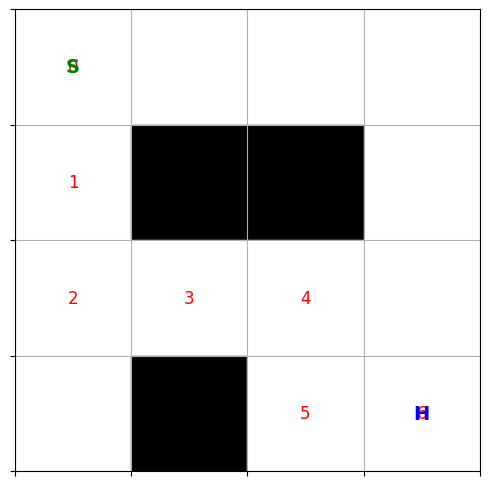

In [6]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt


def visualize_path(matrix, path):
    """Visualizes the grid and the shortest path using BFS."""
    rows, cols = len(matrix), len(matrix[0])
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Create a grid visualization
    grid = np.array(matrix)
    for i in range(rows):
        for j in range(cols):
            color = 'white' if grid[i, j] == 0 else 'black'
            ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, color=color, edgecolor='gray'))

    # Plot the path
    if path:
        for idx, (x, y) in enumerate(path):
            ax.text(y + 0.5, rows - x - 0.5, str(idx), fontsize=12, ha='center', va='center', color='red')

    # Mark Start and End
    ax.text(0.5, rows - 0.5, 'S', fontsize=14, ha='center', va='center', color='green', fontweight='bold')
    ax.text(3.5, rows - 3.5, 'H', fontsize=14, ha='center', va='center', color='blue', fontweight='bold')

    ax.set_xticks(range(cols + 1))
    ax.set_yticks(range(rows + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    plt.show()

def find_shortest_path(matrix):
    """Finds the shortest path in a 2D grid using BFS."""
    rows, cols = len(matrix), len(matrix[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    
    # Convert from 1-based indexing to 0-based
    start = (0, 0)  # Ali's position (1,1) → (0,0)
    end = (3, 3)    # Home position (4,4) → (3,3)
    
    queue = deque([(start, [])])  # (position, path taken)
    visited = set()
    visited.add(start)
    
    while queue:
        (x, y), path = queue.popleft()
        
        # If we reached the destination, return the path
        if (x, y) == end:
            return path + [(x, y)]
        
        # Explore all possible moves
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            
            if 0 <= nx < rows and 0 <= ny < cols and matrix[nx][ny] == 0 and (nx, ny) not in visited:
                queue.append(((nx, ny), path + [(x, y)]))
                visited.add((nx, ny))
    
    return None  # No path found

# Example Grid (0 = Open Path, 1 = Obstacle)
matrix = [
    [0, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 1, 0, 0]
]

# Running the function
shortest_path = find_shortest_path(matrix)
print("Shortest Path:", shortest_path)

# Visualize the path
visualize_path(matrix, shortest_path)

# Question 2

In [1]:
import time
from collections import deque

def state_to_tuple(state):
    """Convert a string state to a tuple representation."""
    return tuple(state)

def get_moves(state):
    """Generate possible moves from the given state."""
    moves = []
    zero_index = state.index('0')
    row, col = zero_index // 3, zero_index % 3

    # Possible move directions (Up, Down, Left, Right)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < 3 and 0 <= new_col < 3:
            new_index = new_row * 3 + new_col
            new_state = list(state)
            new_state[zero_index], new_state[new_index] = new_state[new_index], new_state[zero_index]
            moves.append(tuple(new_state))

    return moves

def dfs(start_state, goal_state, max_depth=30):
    """Perform Depth-First Search (DFS) with depth limitation."""
    stack = [(start_state, [], 0)]  # (current state, path taken, depth)
    visited = set()

    while stack:
        current_state, path, depth = stack.pop()

        if current_state == goal_state:
            return path + [current_state]

        if depth >= max_depth:  # Prevent infinite recursion
            continue

        if current_state in visited:
            continue
        visited.add(current_state)

        # Exploring neighbors in reversed order to maintain depth-first behavior
        for move in reversed(get_moves(current_state)):
            if move not in visited:
                stack.append((move, path + [current_state], depth + 1))

    return None  # No solution found

def main():
    """Main function to take input and execute the DFS algorithm."""
    start_state = input("Enter start State: ")  
    goal_state = input("Enter goal State: ")
    
    start_tuple = state_to_tuple(start_state)  
    goal_tuple = state_to_tuple(goal_state)
    
    print("-----------------")  
    print("DFS Algorithm")  
    print("-----------------")
    
    start_time = time.time()  
    solution_path = dfs(start_tuple, goal_tuple, max_depth=30)  
    end_time = time.time()
    
    if solution_path:
        print("Time taken:", end_time - start_time, "seconds")  
        print("Path Cost:", len(solution_path))  
        print("No of Nodes Visited:", len(solution_path) + 1)  
        for state in solution_path:
            for i in range(0, 9, 3):
                print(' '.join(state[i:i+3]))
            print("-----")  
    else:
        print("No solution found.")

if __name__ == "__main__":  
    main()

-----------------
DFS Algorithm
-----------------
Time taken: 0.052219390869140625 seconds
Path Cost: 31
No of Nodes Visited: 32
1 2 0
3 4 5
6 7 8
-----
1 2 5
3 4 0
6 7 8
-----
1 2 5
3 4 8
6 7 0
-----
1 2 5
3 4 8
6 0 7
-----
1 2 5
3 0 8
6 4 7
-----
1 0 5
3 2 8
6 4 7
-----
0 1 5
3 2 8
6 4 7
-----
3 1 5
0 2 8
6 4 7
-----
3 1 5
6 2 8
0 4 7
-----
3 1 5
6 2 8
4 0 7
-----
3 1 5
6 2 8
4 7 0
-----
3 1 5
6 2 0
4 7 8
-----
3 1 0
6 2 5
4 7 8
-----
3 0 1
6 2 5
4 7 8
-----
0 3 1
6 2 5
4 7 8
-----
6 3 1
0 2 5
4 7 8
-----
6 3 1
4 2 5
0 7 8
-----
6 3 1
4 2 5
7 0 8
-----
6 3 1
4 2 5
7 8 0
-----
6 3 1
4 2 0
7 8 5
-----
6 3 1
4 0 2
7 8 5
-----
6 3 1
0 4 2
7 8 5
-----
0 3 1
6 4 2
7 8 5
-----
3 0 1
6 4 2
7 8 5
-----
3 1 0
6 4 2
7 8 5
-----
3 1 2
6 4 0
7 8 5
-----
3 1 2
6 4 5
7 8 0
-----
3 1 2
6 4 5
7 0 8
-----
3 1 2
6 4 5
0 7 8
-----
3 1 2
0 4 5
6 7 8
-----
0 1 2
3 4 5
6 7 8
-----


# Question 3

In [2]:
import heapq

class Graph:
    def __init__(self, adjacency_list, heuristic):
        """Initializes the graph with an adjacency list and heuristic function."""
        self.adjacency_list = adjacency_list
        self.heuristic = heuristic

    def get_neighbors(self, node):
        """Returns the neighbors of a given node."""
        return self.adjacency_list.get(node, {})

    def a_star_algorithm(self, start_node, stop_node):
        """Implements the A* search algorithm to find the optimal path."""
        open_list = []
        heapq.heappush(open_list, (0, start_node))  # (f(n), node)
        g = {start_node: 0}  # Cost from start node to all other nodes
        parents = {start_node: None}

        while open_list:
            _, current_node = heapq.heappop(open_list)

            if current_node == stop_node:
                return self.reconstruct_path(parents, stop_node, g[stop_node])

            for neighbor, cost in self.get_neighbors(current_node).items():
                temp_g = g[current_node] + cost
                
                if neighbor not in g or temp_g < g[neighbor]:
                    g[neighbor] = temp_g
                    f = temp_g + self.heuristic.get(neighbor, float('inf'))
                    heapq.heappush(open_list, (f, neighbor))
                    parents[neighbor] = current_node
        
        return "Path does not exist!"

    def reconstruct_path(self, parents, node, total_cost):
        """Reconstructs the path from start to goal."""
        path = []
        while node:
            path.append(node)
            node = parents[node]
        path.reverse()
        return f"Sentence: {' '.join(path)}\nTotal cost: {total_cost}"

# Define the heuristic function
heuristic = {
    "The": 4,
    "cat": 3,
    "dog": 3,
    "runs": 2,
    "fast": 1
}

# Define the graph adjacency list
adjacency_list = {
    "The": {"cat": 1, "dog": 2},
    "cat": {"runs": 1},
    "dog": {"runs": 2},
    "runs": {"fast": 1}
}

graph = Graph(adjacency_list, heuristic)
result = graph.a_star_algorithm("The", "fast")
print(result)

Sentence: The cat runs fast
Total cost: 3
